# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [72]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [73]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상 -> output_layer의 노드수 == 5

In [74]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [75]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [76]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [77]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [78]:
n = x_train.shape[1]

### (1) 모델1

In [79]:
clear_session()

model1 = Sequential(
    Dense(5, input_shape=(n, ), activation='softmax')
)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model1.compile(optimizer = Adam(0.05), loss = 'sparse_categorical_crossentropy')
hist = model1.fit(x_train, y_train, epochs=150, validation_split=.2, verbose=0).history

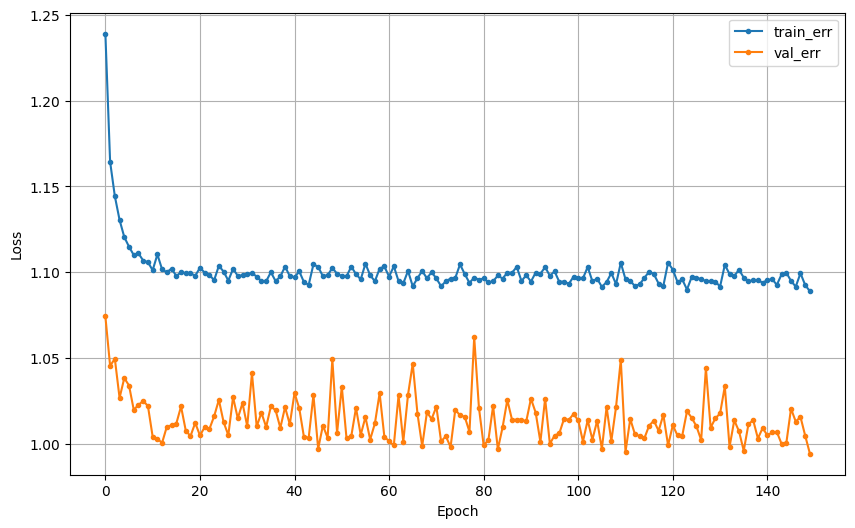

In [81]:
dl_history_plot(hist)

In [82]:
pred1 = model1.predict(x_val)
pred1[:5]

46/46 [==============================] - 0s 1ms/step


array([[0.00941267, 0.13622278, 0.61492884, 0.19830094, 0.04113461],
       [0.02414578, 0.2467688 , 0.46537665, 0.23219332, 0.03151544],
       [0.00698895, 0.11342365, 0.52492136, 0.31238124, 0.04228484],
       [0.03047561, 0.2861364 , 0.5137084 , 0.16121602, 0.00846354],
       [0.02311987, 0.30123296, 0.5045291 , 0.15777293, 0.0133451 ]],
      dtype=float32)

In [83]:
pred_1 = pred1.argmax(axis=1)
pred_1

array([2, 2, 2, ..., 1, 2, 2])

In [84]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[  2  30  28   0   1]
 [  0 221 215   1   1]
 [  0 117 520  23   0]
 [  0   8 214  28   0]
 [  0   0  48  13   0]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        61
           1       0.59      0.50      0.54       438
           2       0.51      0.79      0.62       660
           3       0.43      0.11      0.18       250
           4       0.00      0.00      0.00        61

    accuracy                           0.52      1470
   macro avg       0.51      0.29      0.28      1470
weighted avg       0.52      0.52      0.47      1470



### (2) 모델2

In [85]:
clear_session()
n = x_train.shape[1]
model2 = Sequential([
    Dense(10, input_shape=(n,), activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(5, activation='softmax')
])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
                                                                 
Total params: 263 (1.03 KB)
Trainable params: 263 (1.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model2.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model2.fit(x_train, y_train, epochs=50, validation_split=.2, verbose=0).history

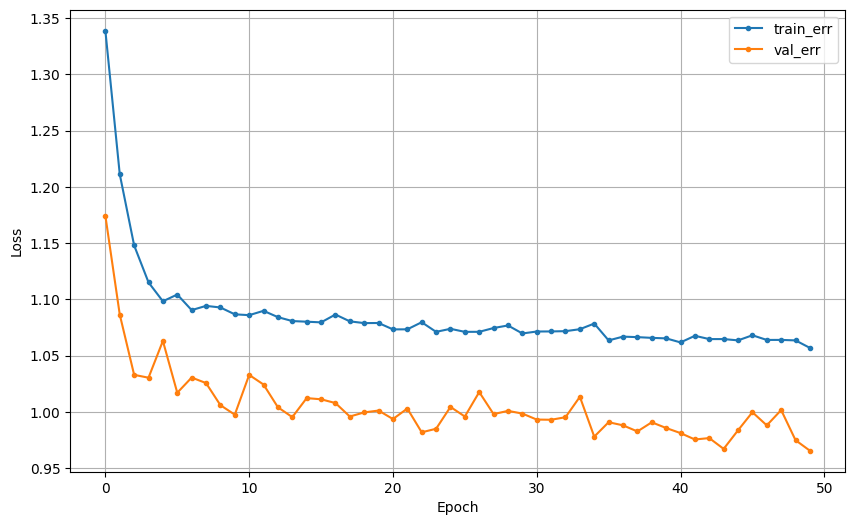

In [87]:
dl_history_plot(hist)

In [88]:
pred2 = model2.predict(x_val)
pred_2 = pred2.argmax(axis=1)

46/46 [==============================] - 0s 2ms/step


In [89]:
print(confusion_matrix(y_val, pred_2))
print(classification_report(y_val, pred_2))

[[  3  38  20   0   0]
 [  2 252 181   3   0]
 [  1 125 460  74   0]
 [  0   2 165  83   0]
 [  0   0  34  27   0]]
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        61
           1       0.60      0.58      0.59       438
           2       0.53      0.70      0.61       660
           3       0.44      0.33      0.38       250
           4       0.00      0.00      0.00        61

    accuracy                           0.54      1470
   macro avg       0.42      0.33      0.33      1470
weighted avg       0.52      0.54      0.52      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (3) 모델3

In [111]:
clear_session()
model3 = Sequential([
    Dense(10, input_shape=(n,), activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(10, activation='relu'),
    Dense(8, activation='relu'),
    Dense(5, activation='softmax')
])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
Total params: 431 (1.68 KB)
Trainable params: 431 (1.68 

In [112]:
model3.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model3.fit(x_train, y_train, epochs=150, validation_split=.2, verbose=0).history

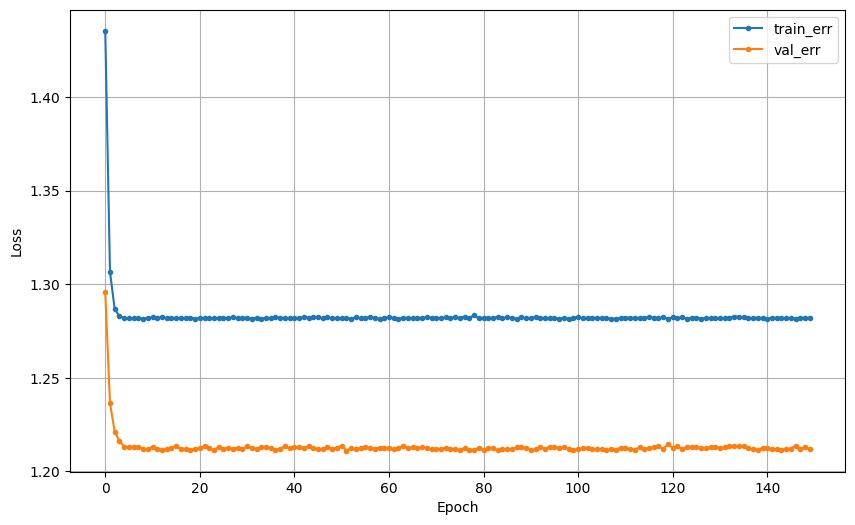

In [113]:
dl_history_plot(hist)

In [114]:
pred3 = model3.predict(x_val)
pred_3 = pred3.argmax(axis=1)

46/46 [==============================] - 0s 1ms/step


In [115]:
print(confusion_matrix(y_val, pred_3))
print(classification_report(y_val, pred_3))

[[  0   0  61   0   0]
 [  0   0 438   0   0]
 [  0   0 660   0   0]
 [  0   0 250   0   0]
 [  0   0  61   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.00      0.00      0.00       438
           2       0.45      1.00      0.62       660
           3       0.00      0.00      0.00       250
           4       0.00      0.00      0.00        61

    accuracy                           0.45      1470
   macro avg       0.09      0.20      0.12      1470
weighted avg       0.20      0.45      0.28      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
